In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn 

C:\Users\sama\AppData\Local\Temp\ipykernel_11940\1467430578.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Data =pd.read_csv(r'E:\سنه تالتة تيرم اول\Python\pythonProject\kc_house_data.csv')
Data.drop('id',axis=1,inplace=True)

In [3]:
Data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

<Axes: xlabel='price', ylabel='Count'>

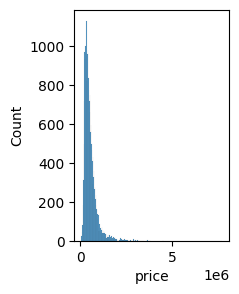

In [5]:
plt.figure(figsize=(2,3))
sn.histplot(Data['price'])



<Axes: xlabel='bedrooms', ylabel='count'>

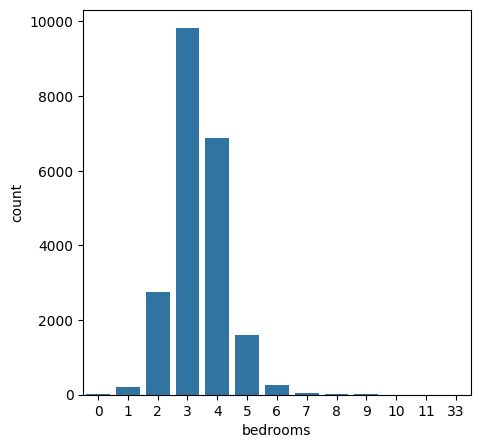

In [6]:
plt.figure(figsize=(5,5))
sn.countplot(x=Data['bedrooms'])


<Axes: xlabel='bathrooms', ylabel='count'>

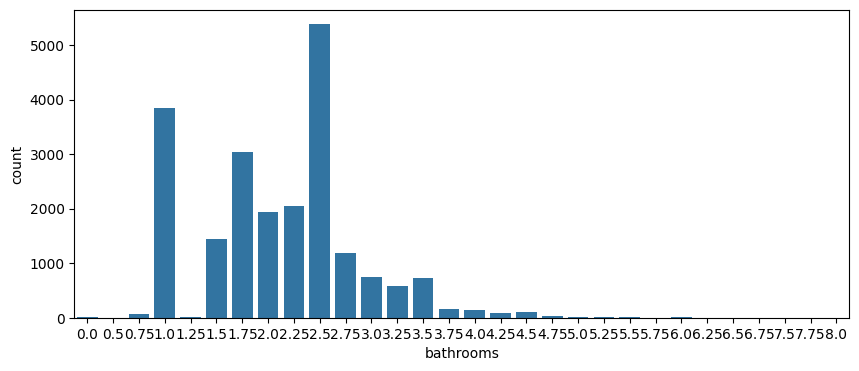

In [7]:
plt.figure(figsize=(10,4))
sn.countplot(x=Data['bathrooms'])


<Axes: xlabel='floors', ylabel='count'>

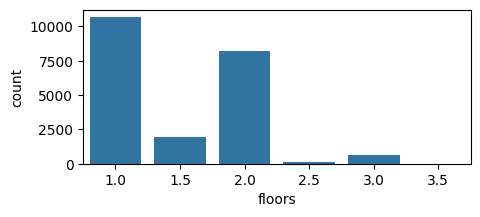

In [8]:
plt.figure(figsize=(5,2)) 
sn.countplot(x=Data['floors'])

<Axes: xlabel='grade', ylabel='count'>

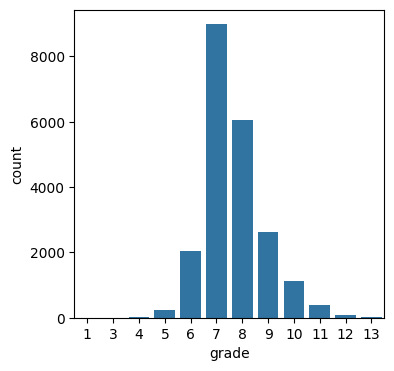

In [9]:
plt.figure(figsize=(4,4))
sn.countplot(x=Data['grade'])

<Axes: xlabel='sqft_living', ylabel='price'>

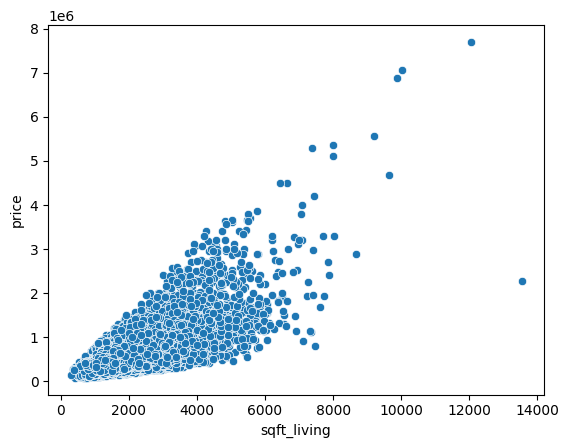

In [10]:
plt.figure()
sn.scatterplot(x=Data['sqft_living'],y=Data['price'])

<Axes: xlabel='bedrooms', ylabel='price'>

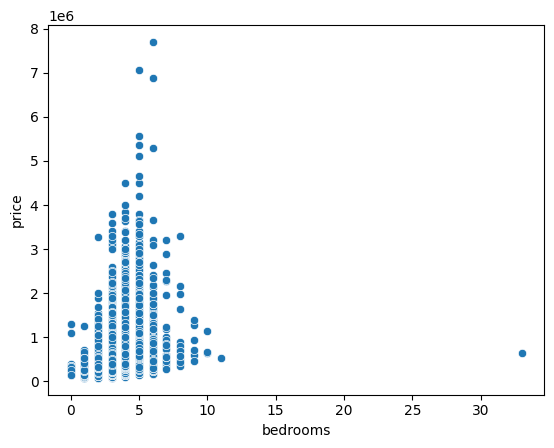

In [11]:
plt.figure()
sn.scatterplot(x=Data['bedrooms'],y=Data['price'])


0        69
1        73
2        91
3        59
4        37
         ..
21608    15
21609    10
21610    15
21611    20
21612    16
Name: age, Length: 21613, dtype: int64


<Axes: xlabel='age', ylabel='price'>

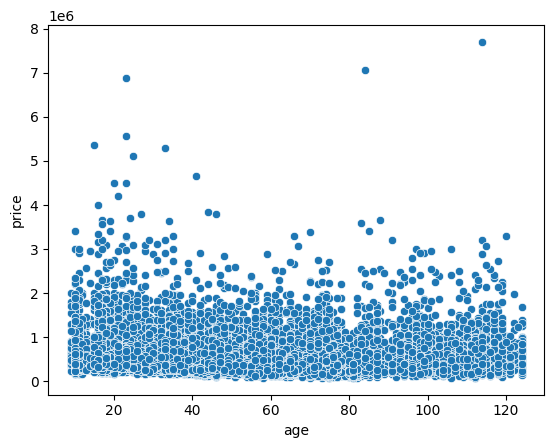

In [12]:
Data['age']= Data['yr_built'].apply( lambda x:2024-x)
print(Data['age'])
plt.figure()
sn.scatterplot(x=Data['age'],y=Data['price'])

In [13]:
x= Data['sqft_living']
y=Data['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [14]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train.array.reshape(-1,1) ,y_train)

print(LR.coef_) #neam(b)in ---->  y=a+bx
print(LR.intercept_) # a

[271.42719981]
-25621.769022429595


In [15]:

y_pred=LR.predict(x_test.array.reshape(-1,1))
pd.DataFrame={'actual':y_test,'predicted':y_pred}


#MSE=(1/4684)* np.sum(np.square(y_pred-y_test))
from sklearn import metrics
metrics.mean_squared_error(y_pred,y_test)
LR.score(x_test.array.reshape(-1,1),y_test)



0.5046861237196529